In [1]:
# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
# Start of magic command which configures the execution environment, to display graphics w/in notebook

In [4]:
## Load dataset and perform some cleaning
auto_prices = pd.read_csv('Automobile price data _Raw_.csv')

def clean_auto_data(auto_prices):
    'Function to load & clean the auto price data set from a .csv file'
    import pandas as pd
    import numpy as np
    
    ## Recode names
    ## Fix column names so the '-' character becomes '_'
    cols = auto_prices.columns
    auto_prices.columns = [str.replace('-','_') for str in cols]
    
    ## Treat missing values
    ## Remove rows w/ missing values, accounting for missing values coded as '?'
    cols = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)
    
    ## Transform column data type
    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
        
    return auto_prices
auto_prices = clean_auto_data(auto_prices)

print(auto_prices.columns)


Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [5]:
## Explore the Data
# Explore first few rows of pandas data frame (head)
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#Above- Price=label for regression model
#Below- Review data types for each column
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [7]:
#Above- Numeric values=Integer & Float, String=Object=categorical
#Below- Compute & display summary statistics for numeric columns
auto_prices.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#Above- When median < mean, indicates distribution is right-skewed, where tail streches to the right
#Below- Compute & display frequency table for categorical variables w/pandas value_counts
def count_unique(auto_prices, cols):
    for col in cols:
        print('\n' + 'For column' + col)
        print(auto_prices[col].value_counts())
        
cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']
count_unique(auto_prices, cat_cols)


For columnmake
toyota           32
nissan           18
mitsubishi       13
honda            13
mazda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

For columnfuel_type
gas       175
diesel     20
Name: fuel_type, dtype: int64

For columnaspiration
std      159
turbo     36
Name: aspiration, dtype: int64

For columnnum_of_doors
four    112
two      81
?         2
Name: num_of_doors, dtype: int64

For columnbody_style
sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

For columndrive_wheels
fwd    116
rwd     71
4wd      8
Name: drive_wheels, dtype: int64

For columnengine_location
front    192
rear       3
Na

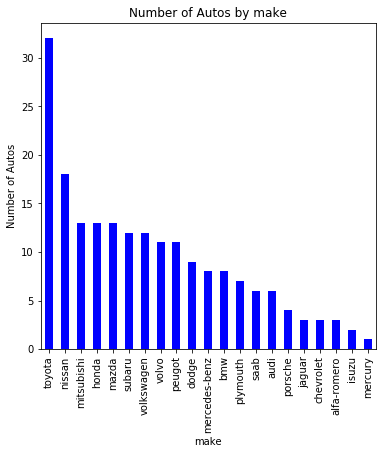

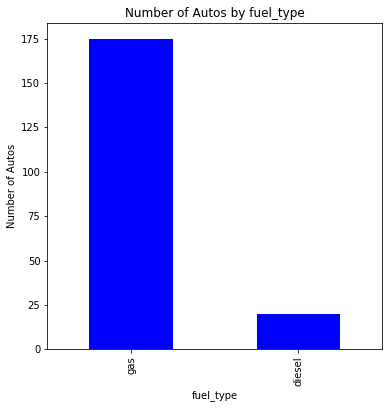

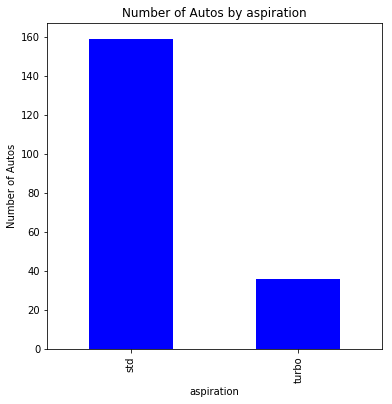

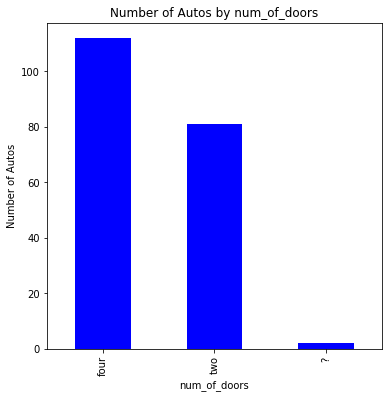

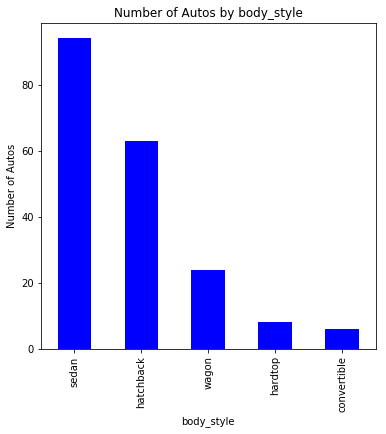

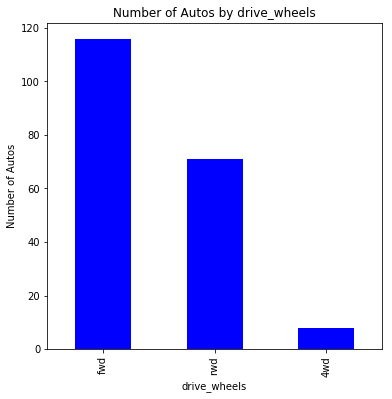

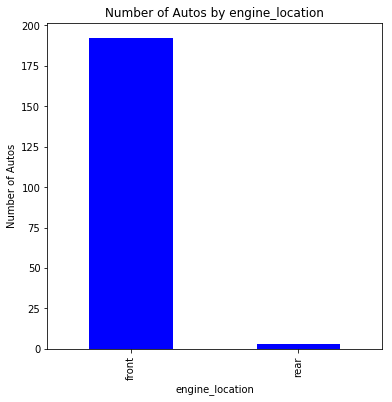

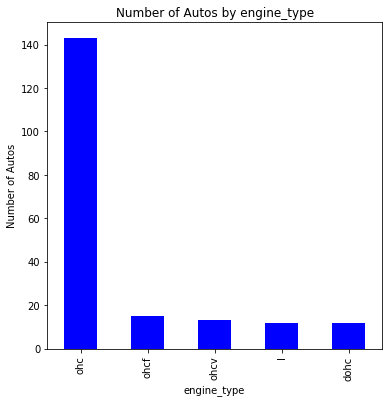

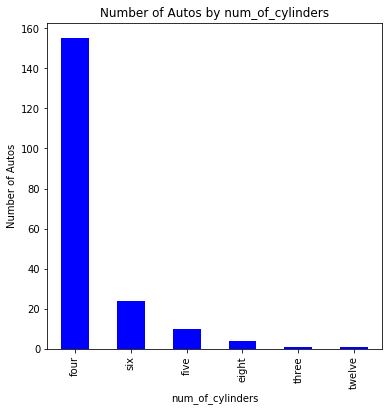

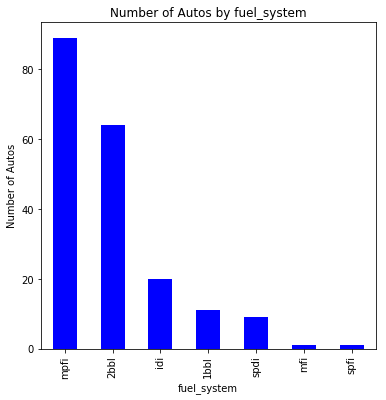

In [18]:
## Visualize the distributions w/ 1 Dimensional Plots
#Step 1- Visualize frequency distributions of categorical variables w/ pandas Bar Chart plot.bar

def plot_bars(auto_prices, cols):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        counts = auto_prices[col].value_counts()    # Find counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue')    # Use plot.bar method from pandas on counts data frame
        ax.set_title('Number of Autos by ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Autos')   # Set y-axis label w/ matplotlib
        plt.show()
        
plot_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
             'engine_type', 'num_of_cylinders', 'fuel_system']
plot_bars(auto_prices, plot_cols)      

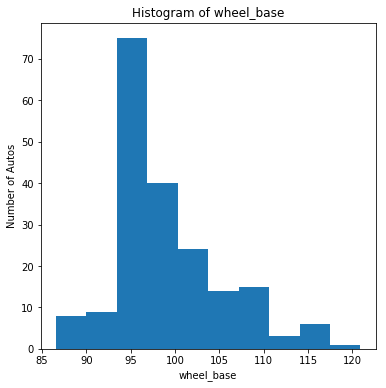

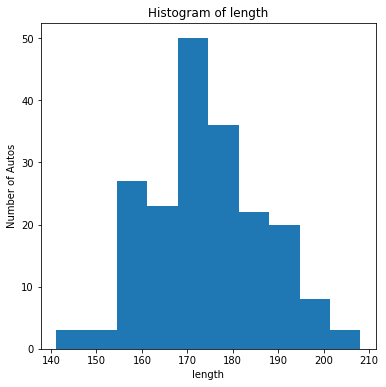

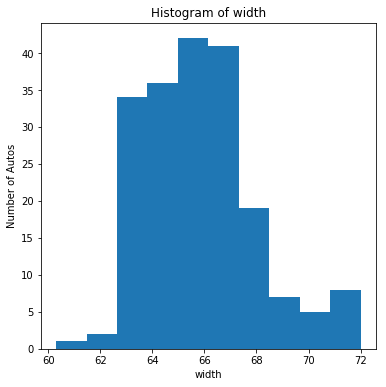

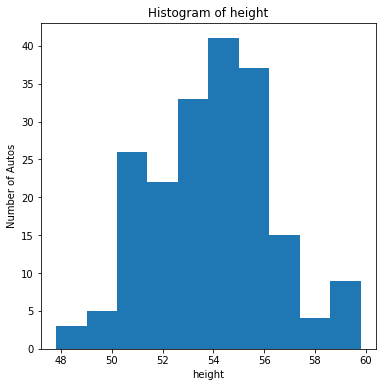

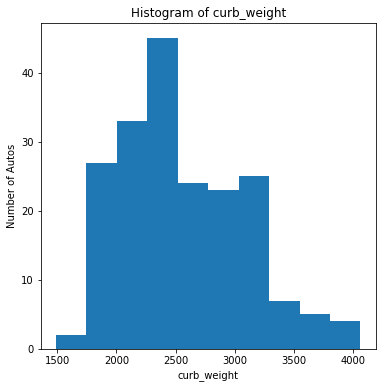

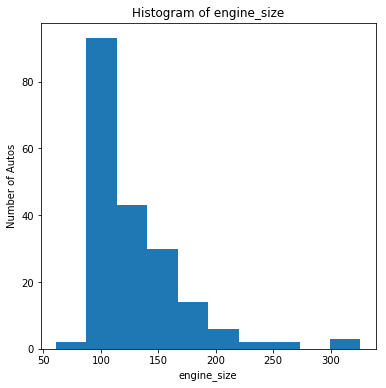

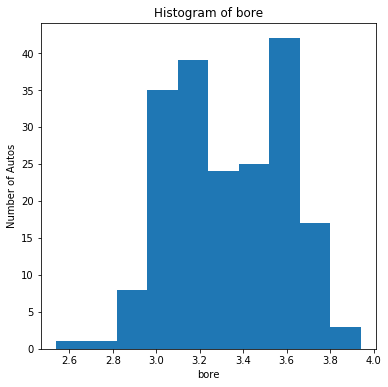

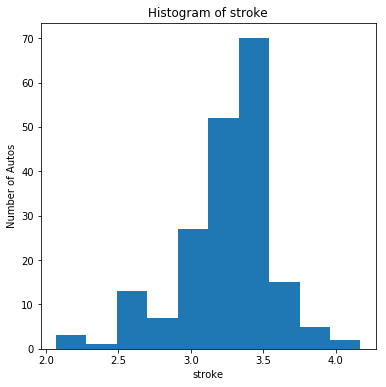

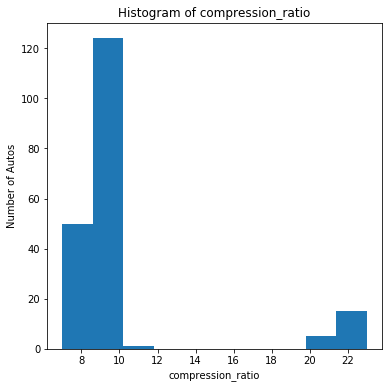

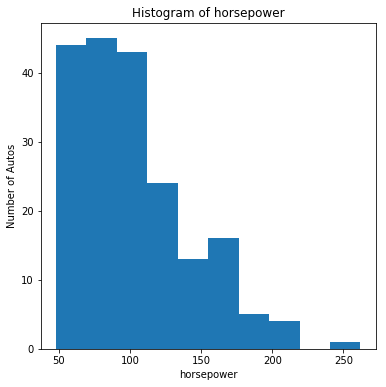

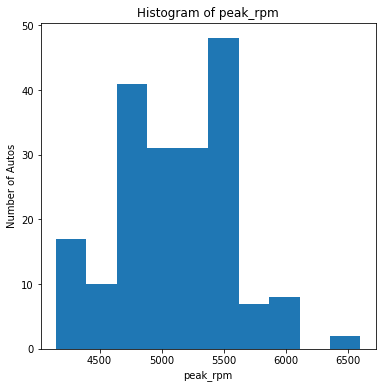

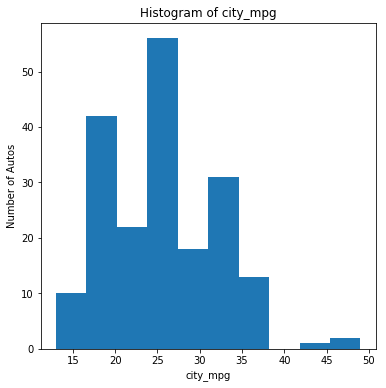

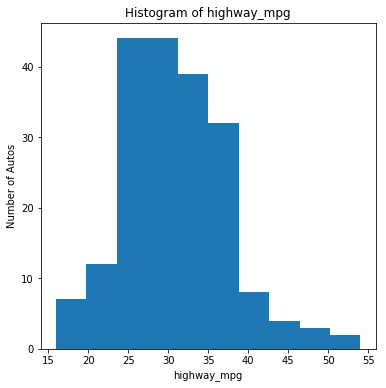

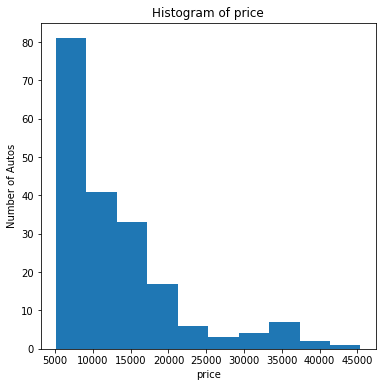

In [21]:
## Visualize the distributions
#Step 2- Visualize binned distributions of numerical variables w/ pandas histograms plot.hist

def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        auto_prices[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Autos')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore',
             'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
plot_histogram(auto_prices, num_cols)      

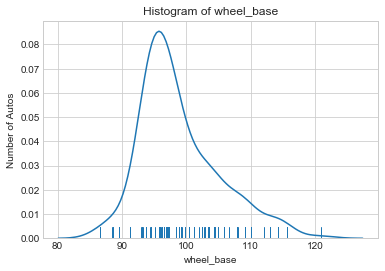

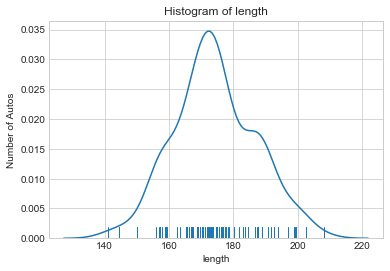

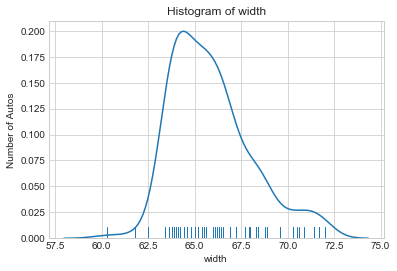

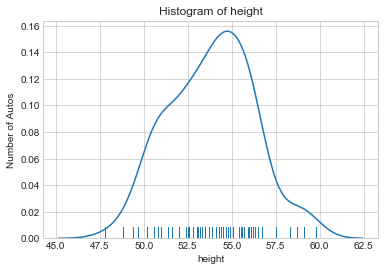

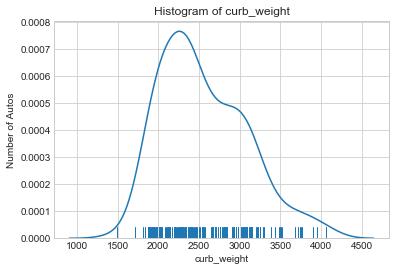

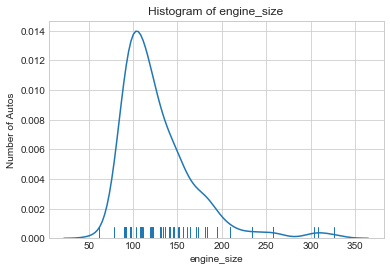

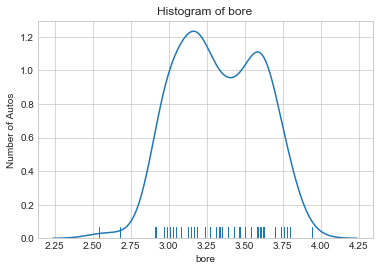

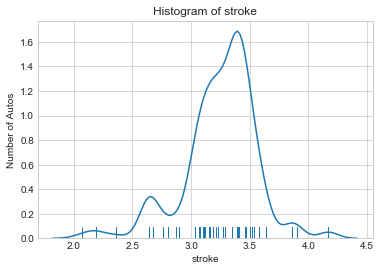

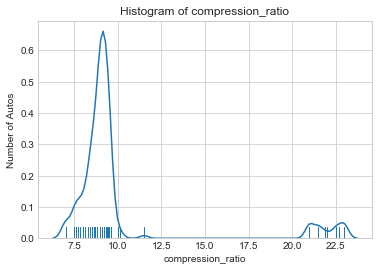

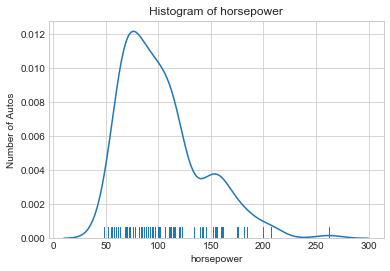

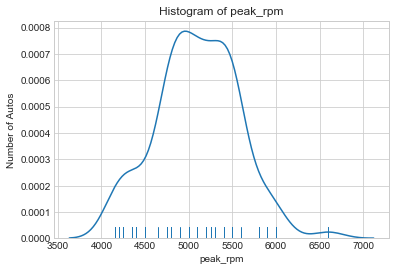

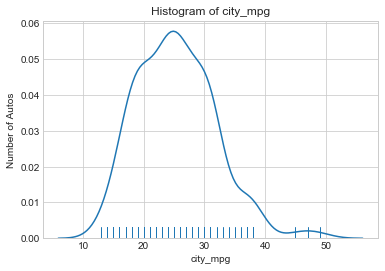

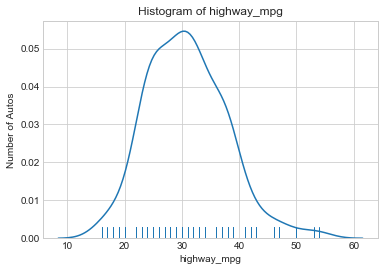

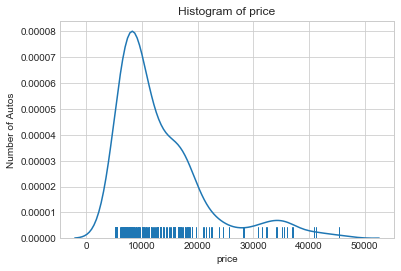

In [22]:
#Above- Many histograms are right-skewed
#Below- Kernel Density Estimation (KDE) plots provides a smooth denisty curve of the data values w/ Seaborn distplot

def plot_density_hist(auto_prices, cols, bins = 10, hist = False):
    for col in cols:        # Iterates over list of columns
        sns.set_style("whitegrid")     # Set style for plot grid
        sns.distplot(auto_prices[col], bins = bins, rug = True, hist = hist)    # Use distplot type w/ rug along x-axis   
        plt.title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        plt.xlabel(col)    # Set x-axis labels w/ matplotlib
        plt.ylabel('Number of Autos')   # Set y-axis label w/ matplotlib
        plt.show()
        
#num_cols = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore',
#            'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
plot_density_hist(auto_prices, num_cols)      

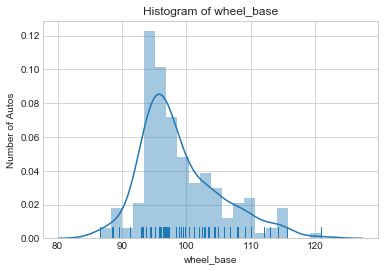

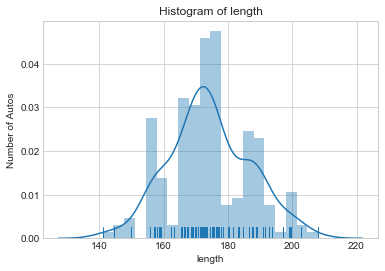

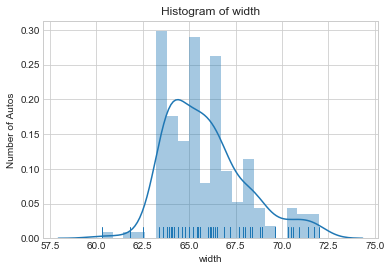

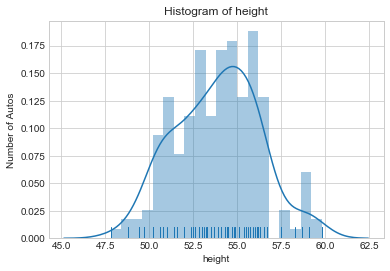

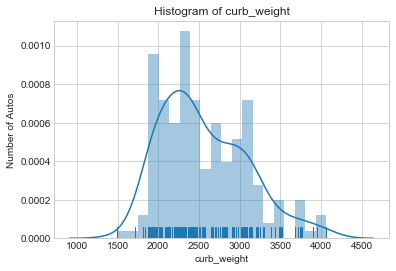

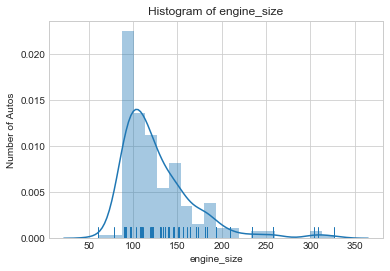

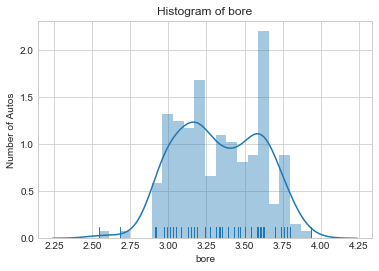

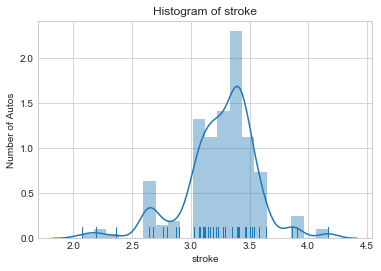

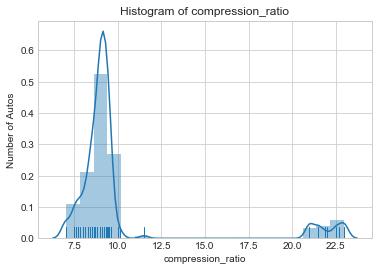

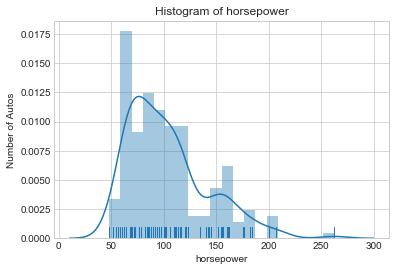

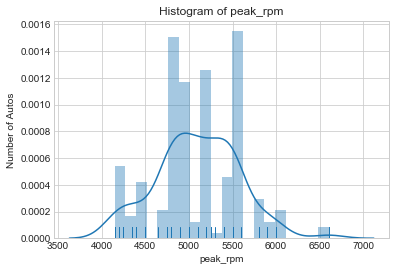

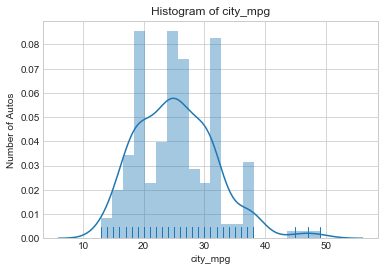

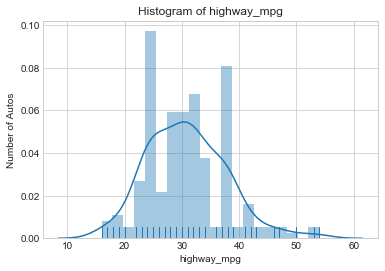

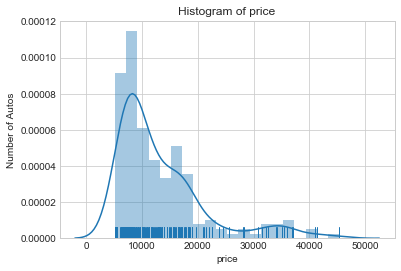

In [23]:
# Combine histogram & KDE plots w/ Seaborn

plot_density_hist(auto_prices, num_cols, bins = 20, hist = True)

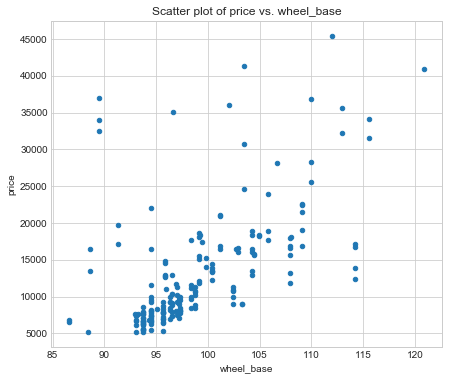

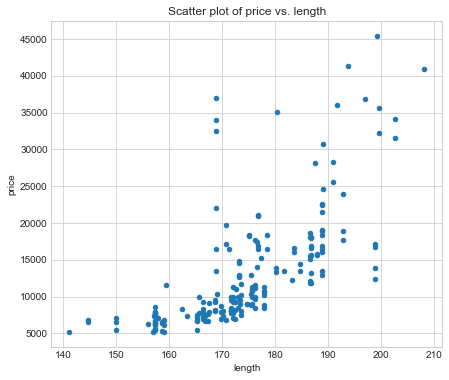

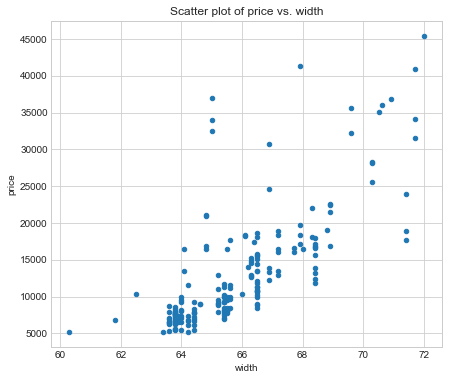

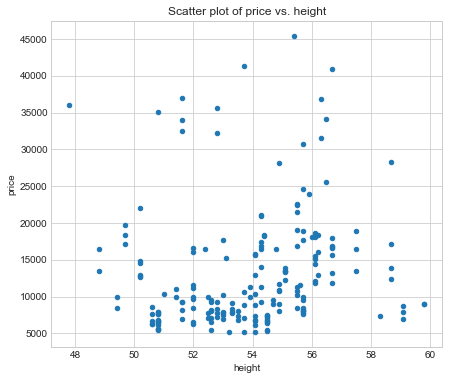

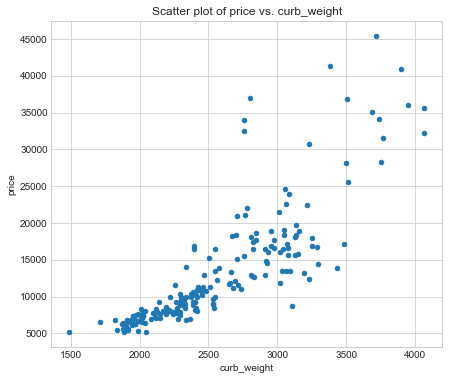

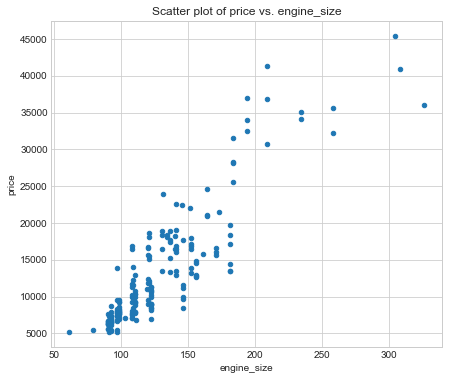

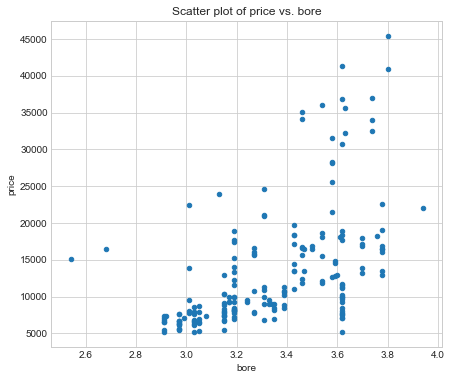

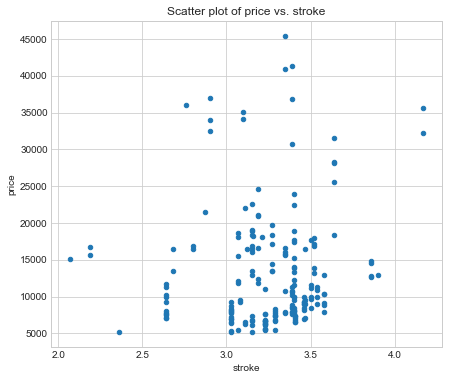

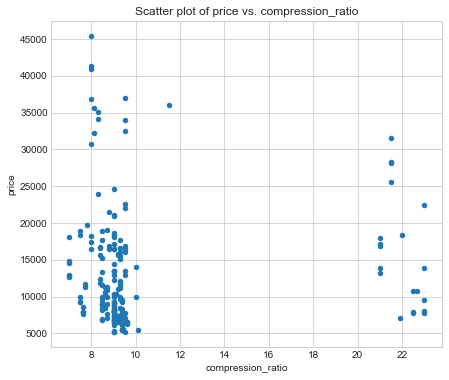

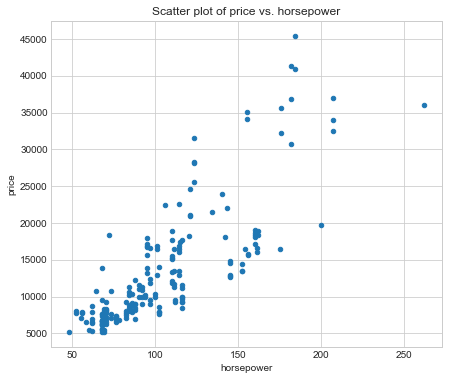

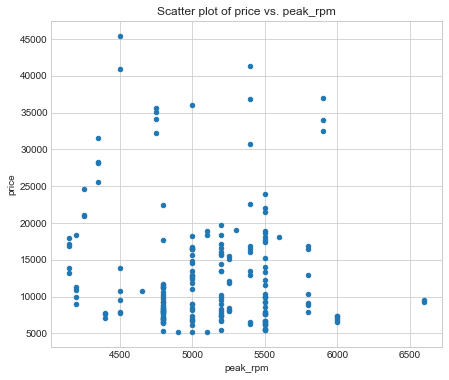

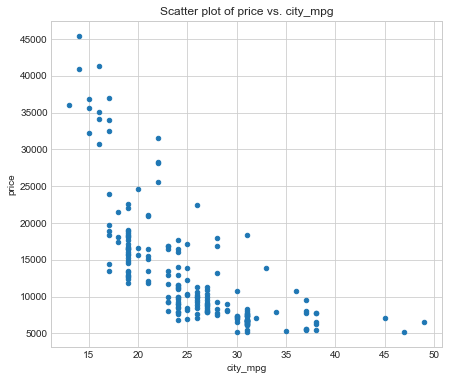

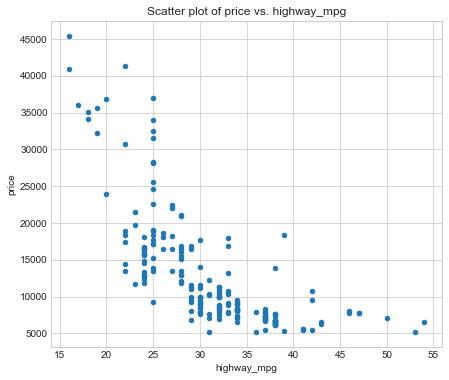

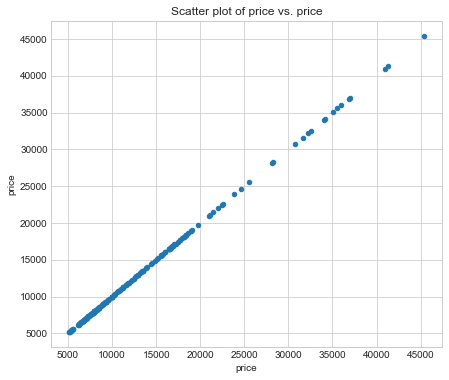

In [25]:
## Visualize the distributions w/ 2 Dimensional Plots (the relationship b/w 2 variables [for ML is b/w features & label])
#Step 1- Visualize frequency distributionsscatter plots of features vs label w/ pandas scatter plots plot.scatter

def plot_scatter(auto_prices, cols, col_y = 'price'):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(7,6))    # Figure plot & axis defined using matplotlib
        ax = fig.gca()
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)    # Use plot.scatter method from pandas on subset of data frame   
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore',
             'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
plot_scatter(auto_prices, num_cols)      

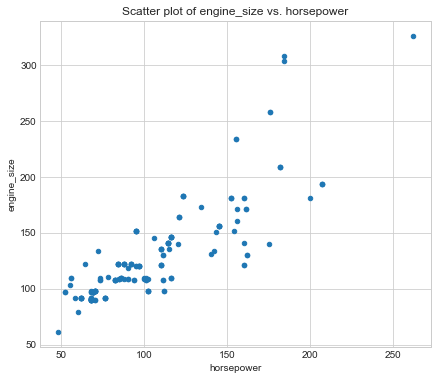

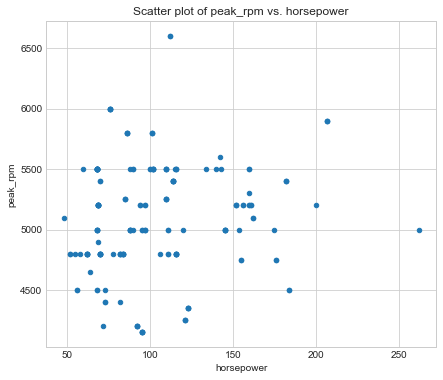

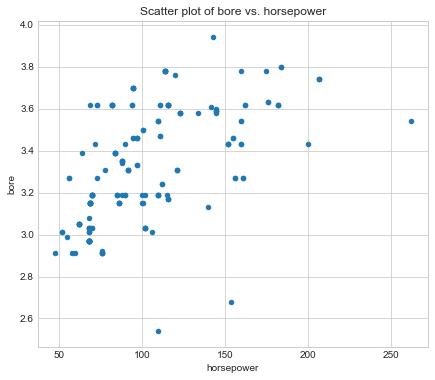

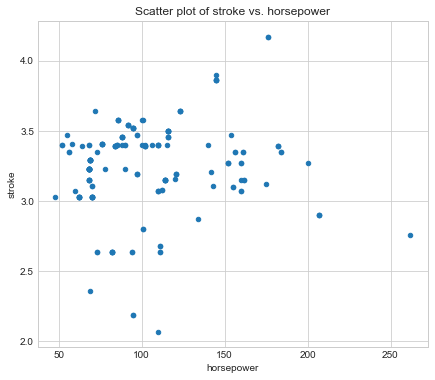

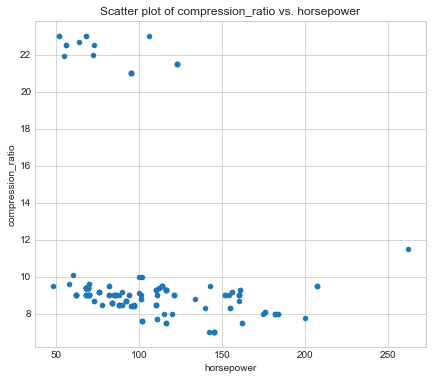

In [28]:
#Above- Strong relationship with label is engine_size, horsepower,  where wheel_base, length, width, height, curb_weight, bore, stroke, compression_ratio, peak_rpm, city_mpg, & highway_mpg do not.
#Below- Test if horespower and engine_size could be colinear

plot_scatter(auto_prices, ['horsepower'], 'engine_size')
plot_scatter(auto_prices, ['horsepower'], 'peak_rpm')
plot_scatter(auto_prices, ['horsepower'], 'bore')
plot_scatter(auto_prices, ['horsepower'], 'stroke')
plot_scatter(auto_prices, ['horsepower'], 'compression_ratio')


#make                  
#fuel_type             
#aspiration            
#num_of_doors          
#body_style            
#drive_wheels          
#engine_location       
##wheel_base           
#length               
#width                
#height               
#curb_weight            
#engine_type           
#num_of_cylinders      
#engine_size            
#fuel_system           
#bore                 
#stroke               
#compression_ratio    
#horsepower             
#peak_rpm               
#city_mpg               
#highway_mpg            
#price                  

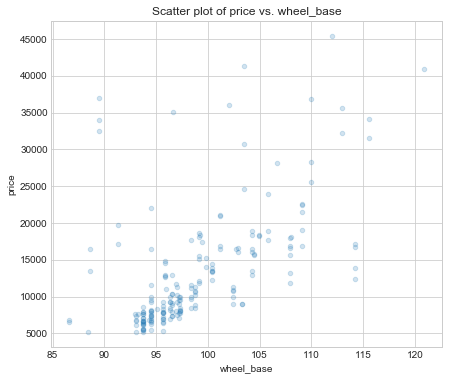

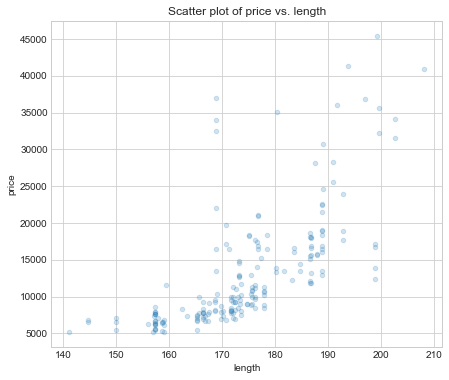

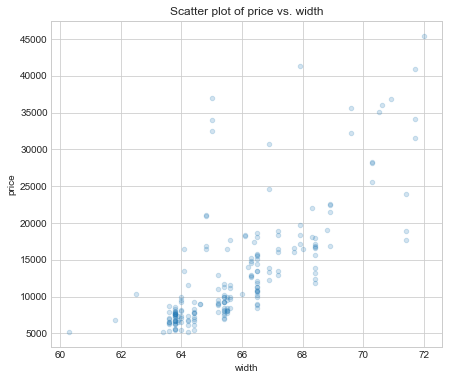

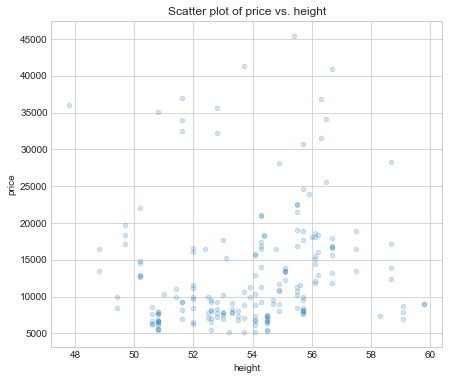

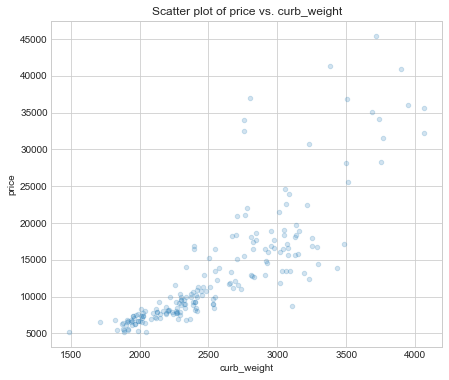

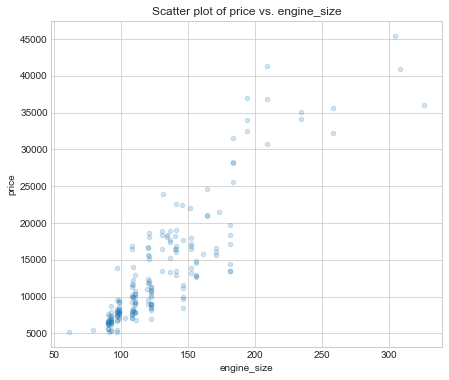

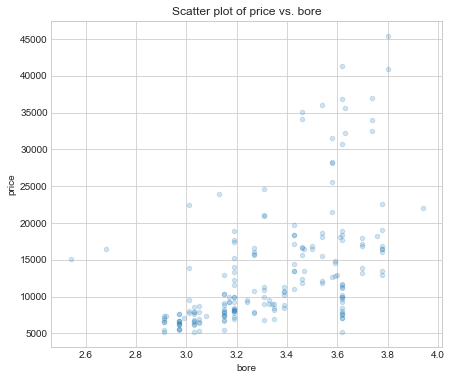

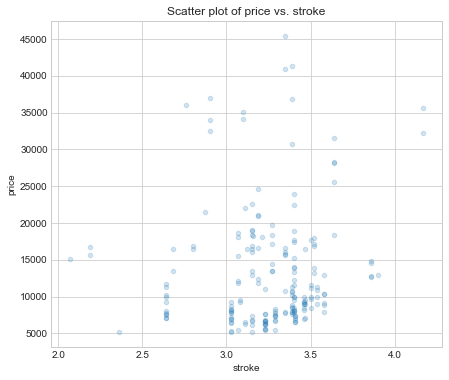

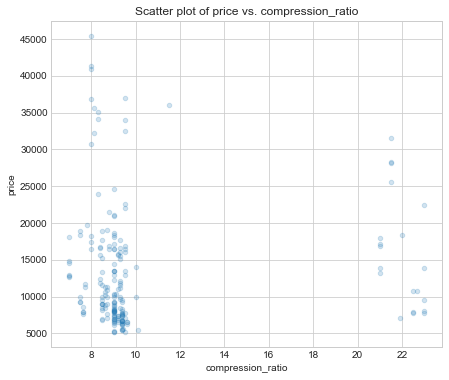

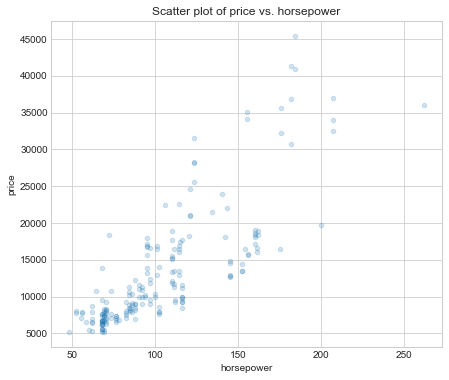

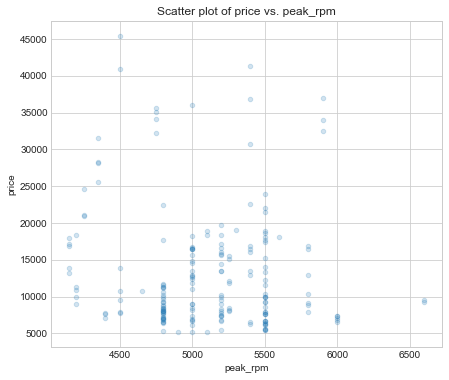

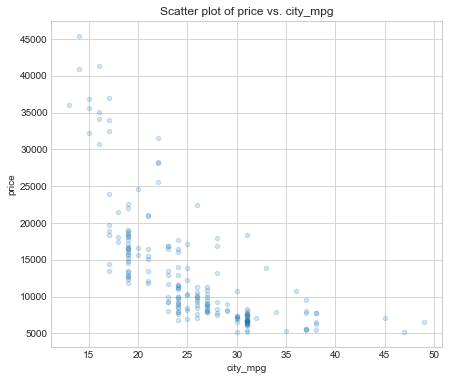

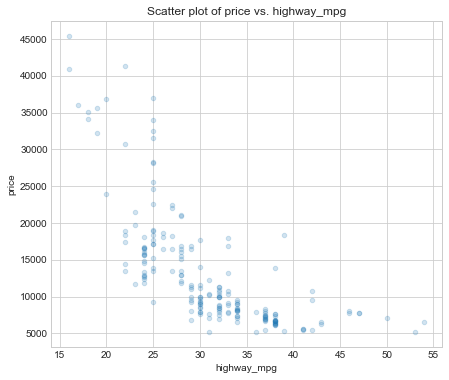

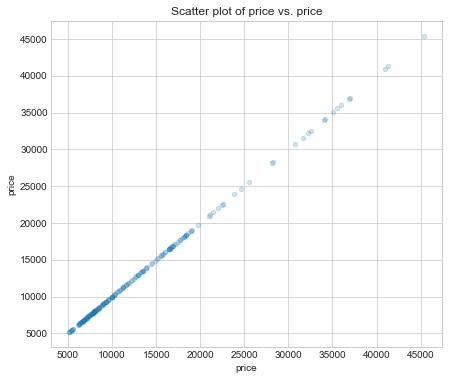

In [29]:
#Above- Since horsepower & engine_size look to be linearly dependent on each other, we can't use them together in ML model
#Below- Deal w/ Overplotting by using transparency

def plot_scatter_t(auto_prices, cols, col_y = 'price', alpha = 1.0):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(7,6))    # Figure plot & axis defined using matplotlib
        ax = fig.gca()
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)    # Use plot.scatter method from pandas on subset of data frame   
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
#num_cols = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore',
#             'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
plot_scatter_t(auto_prices, num_cols, alpha = 0.2)   # alpha=0.2 is high transparency

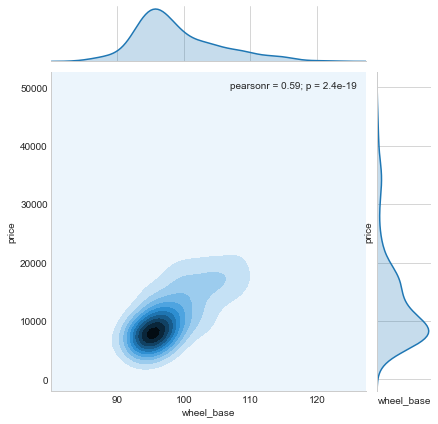

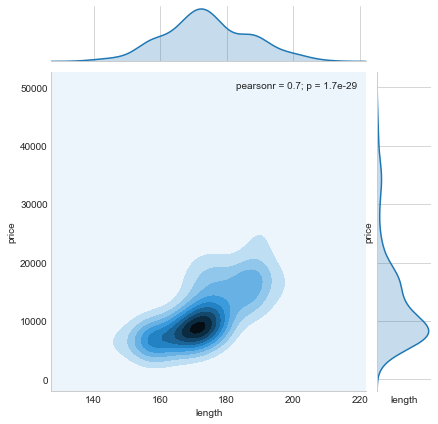

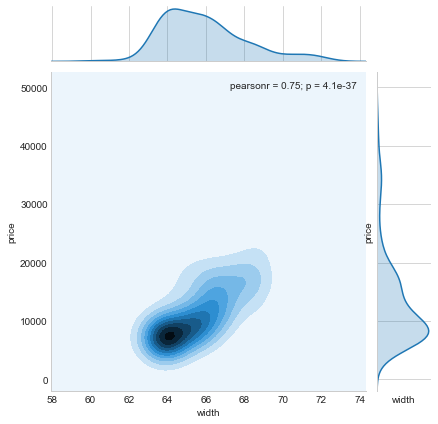

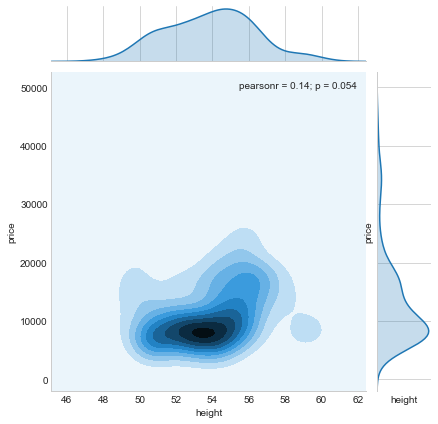

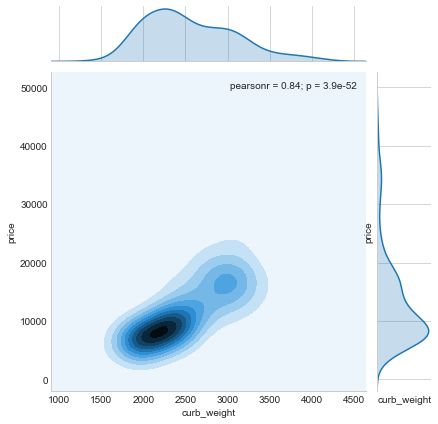

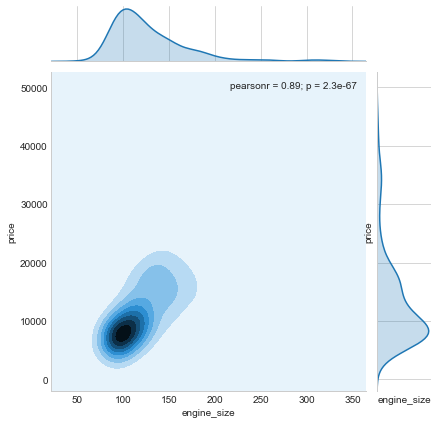

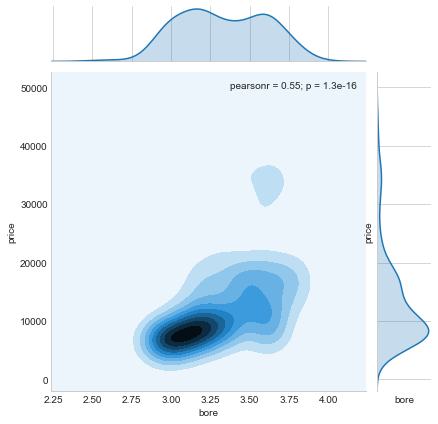

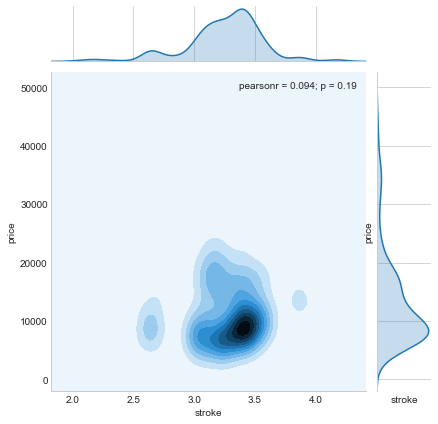

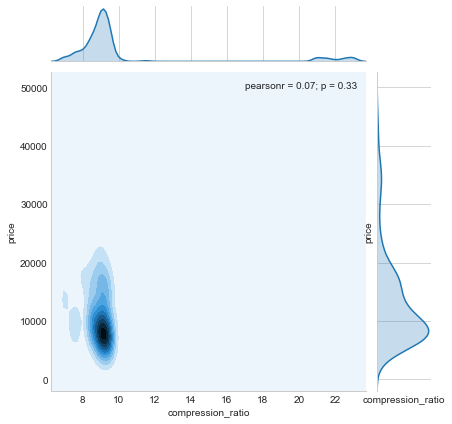

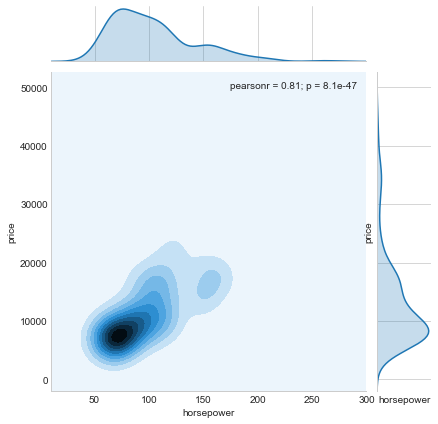

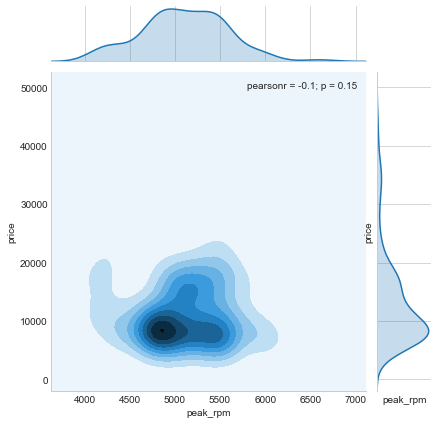

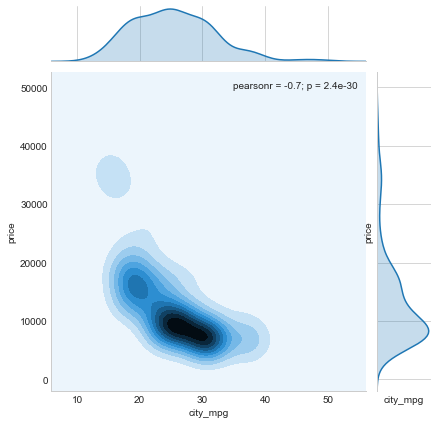

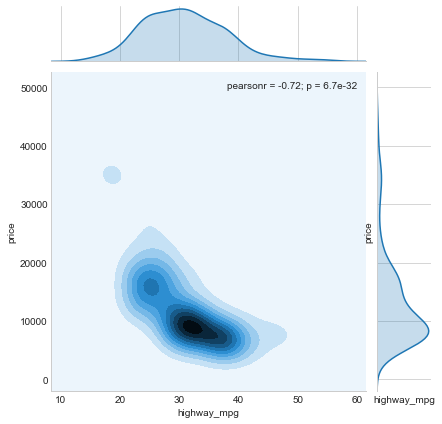

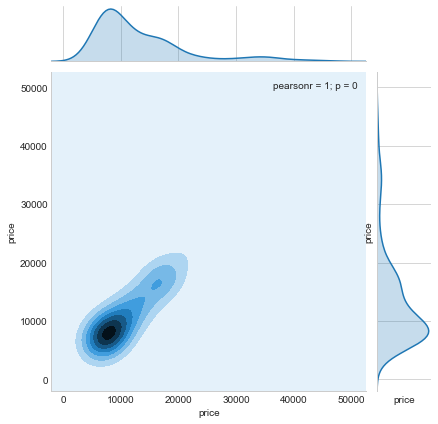

In [33]:
# Deal w/ Overplotting by using Countour plots or 2-D Density Plots w/ Seaborn jointplot

def plot_density_2d(auto_prices, cols, col_y = 'price', kind = 'kde'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.jointplot(col, col_y, data = auto_prices, kind = kind)   # Use jointplot type from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel (col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
plot_density_2d(auto_prices, num_cols)   # Displays 1-D KDE plot slong w/ contour plot showing 2-D Density

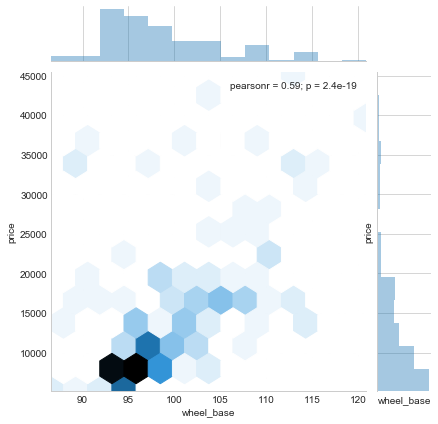

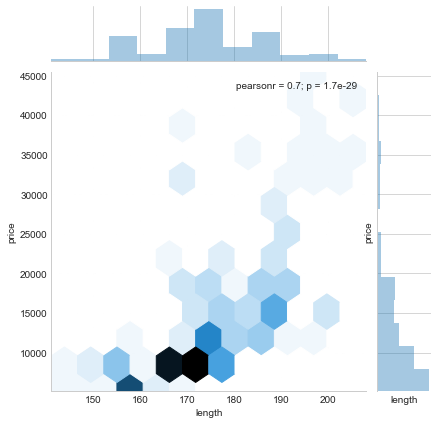

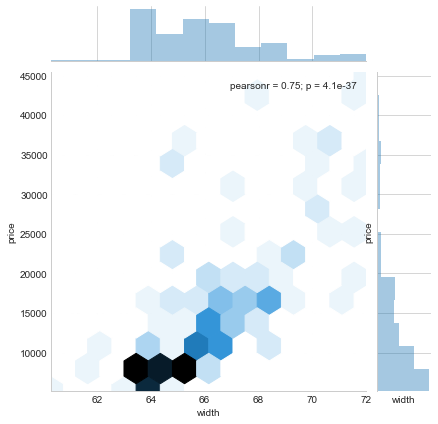

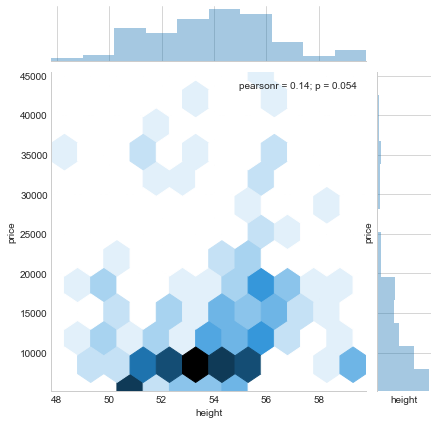

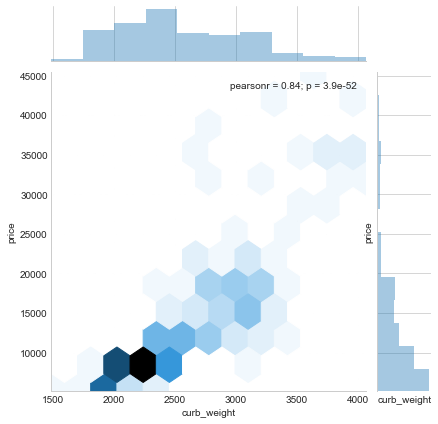

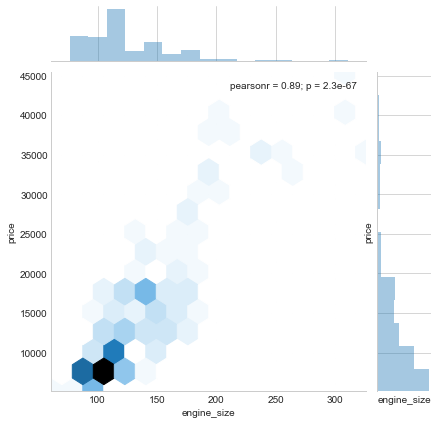

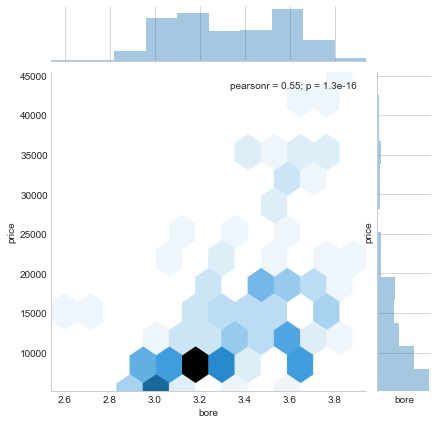

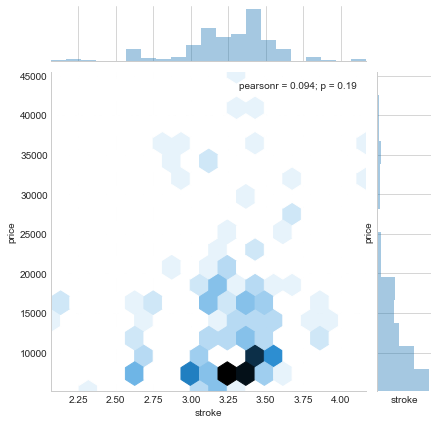

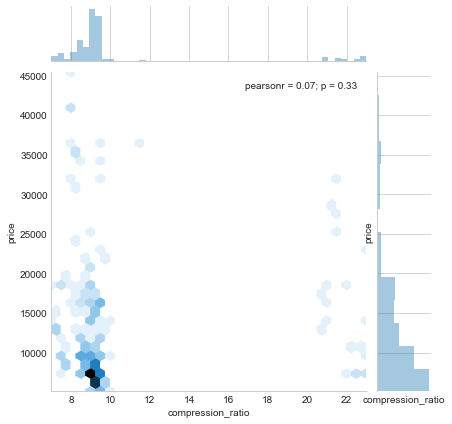

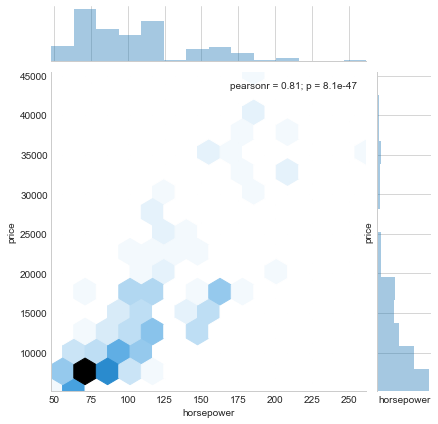

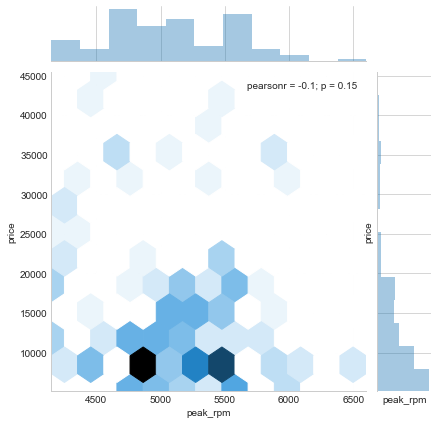

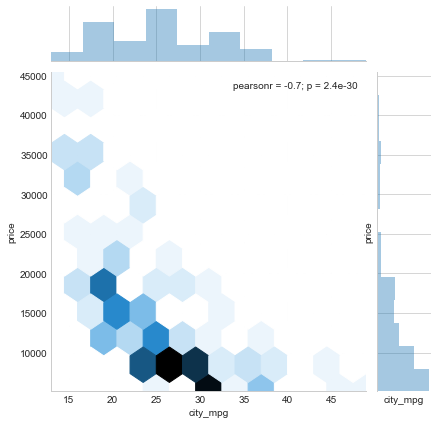

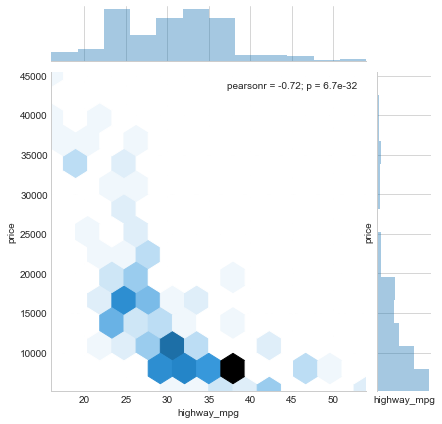

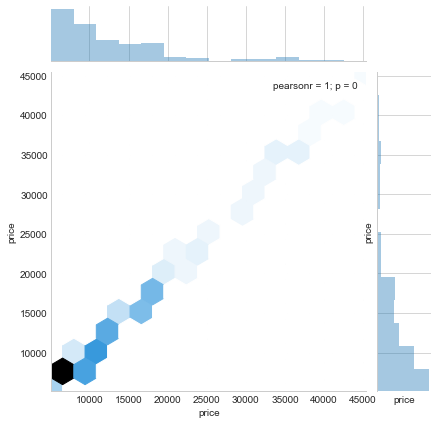

In [34]:
#Above- Shows 2-D multi-modal behavior for curb_weight, horsepower, city_mpg, & highway_mpg
#Below- Deal w/ Overplotting by using Hexbin plots

plot_density_2d(auto_prices, num_cols, kind = 'hex')   #Hexbin shows density of points as 2-D histogram and 1-D histogram of each variable

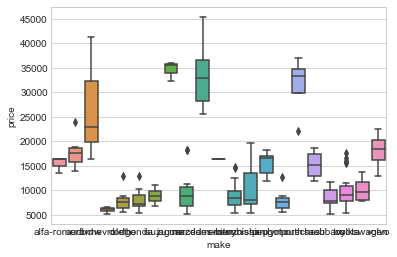

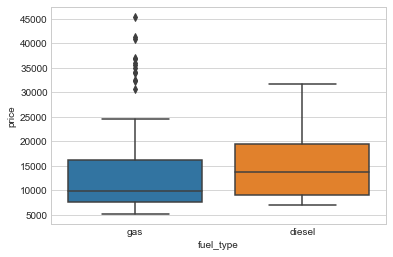

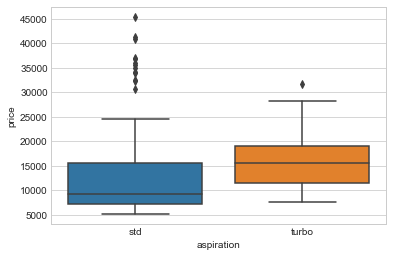

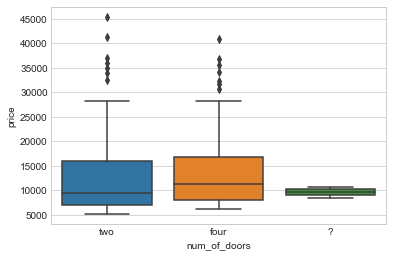

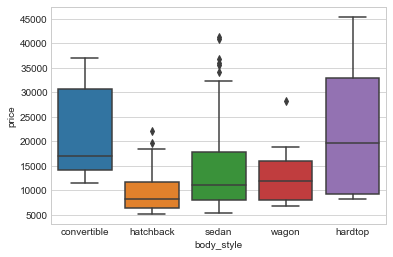

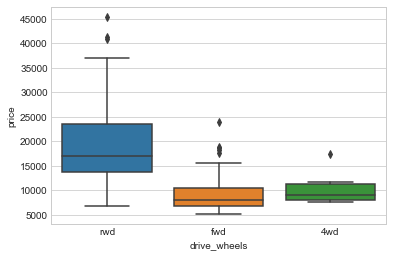

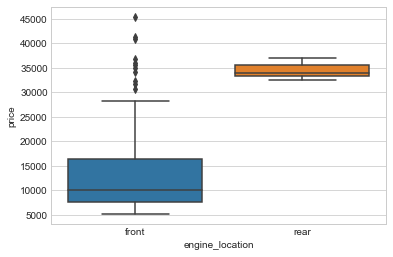

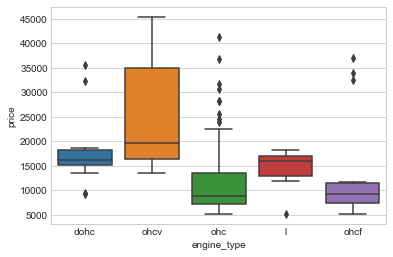

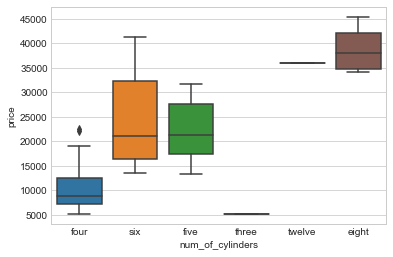

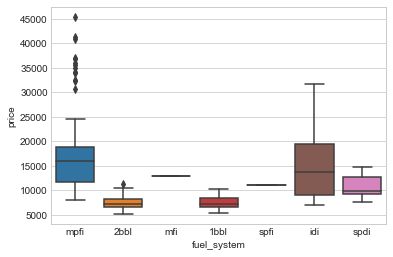

In [36]:
#Above- Hexbin shows more detail since cells w/ 1 point are displayed
#Below- Plot Categorical & Numerical Varibles w/ Seaborn boxplot

def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.boxplot(col, col_y, data = auto_prices)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
             'engine_type', 'num_of_cylinders', 'fuel_system']
plot_box(auto_prices, cat_cols)

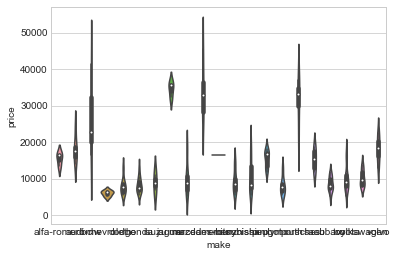

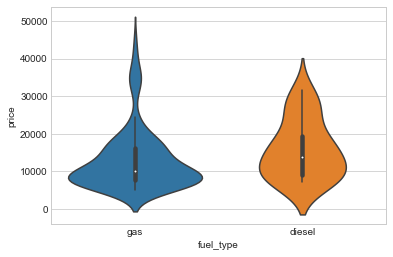

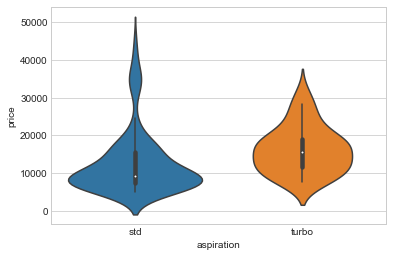

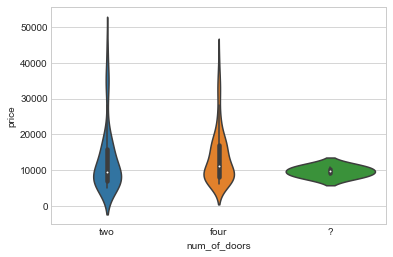

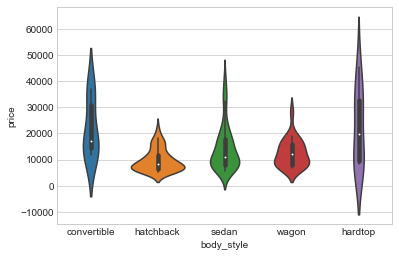

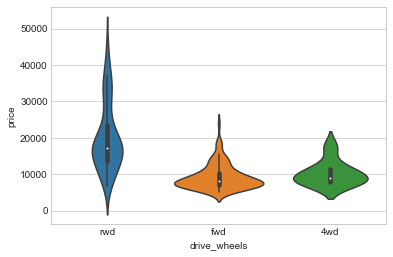

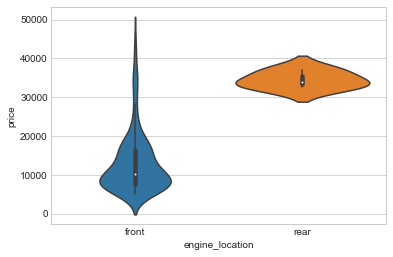

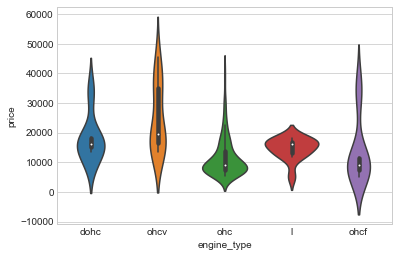

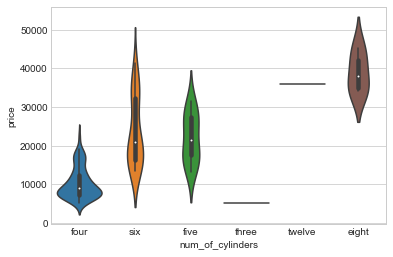

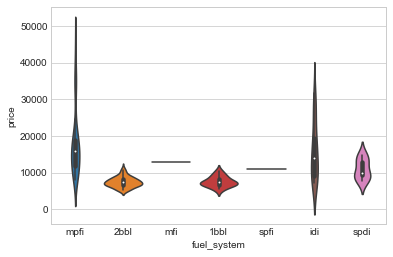

In [37]:
#Above- Engine_location & num_of_cylinders does look to have a relationship with price

# Plot Categorical & Numerical Variables w/ Seaborn violinplot

def plot_violin(auto_prices, cols, col_y = 'price'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.violinplot(col, col_y, data = auto_prices)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
#cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
#             'engine_type', 'num_of_cylinders', 'fuel_system']
plot_violin(auto_prices, cat_cols)

In [ ]:
#Above- Num_of_doors & body_style don't show much of a relationship, but engine_location & num_of_cyl does have a relationship with price
#Below- 